In [195]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Model


In [196]:
img_path='elephant.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)


In [197]:
base_model = VGG16(weights='imagenet')
features={}
for layer in base_model.layers:
    print(layer.name)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer.name).output)
    features[layer.name]=model.predict(x)

input_16
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool
flatten
fc1
fc2
predictions


In [198]:
weights=[]
biases=[]
flag=False

for layer in base_model.layers:
    if len(layer.get_weights())>0:
        weights.append(layer.get_weights()[0])
        biases.append(layer.get_weights()[1])
    

In [199]:
points=[]
points.append([np.argmax(features['predictions'])])
from caffe_classes import class_names
label=class_names[np.argmax(features['predictions'])]



In [200]:
print("weights")
for w in weights:
    print(w.shape)
print("biases")
for b in biases:
    print(b.shape)

weights
(3, 3, 3, 64)
(3, 3, 64, 64)
(3, 3, 64, 128)
(3, 3, 128, 128)
(3, 3, 128, 256)
(3, 3, 256, 256)
(3, 3, 256, 256)
(3, 3, 256, 512)
(3, 3, 512, 512)
(3, 3, 512, 512)
(3, 3, 512, 512)
(3, 3, 512, 512)
(3, 3, 512, 512)
(25088, 4096)
(4096, 4096)
(4096, 1000)
biases
(64,)
(64,)
(128,)
(128,)
(256,)
(256,)
(256,)
(512,)
(512,)
(512,)
(512,)
(512,)
(512,)
(4096,)
(4096,)
(1000,)


In [201]:
class Net:
    def __init__(self):
       
        self.blobs={}
        self.params={}
    def param(self,data):
        if(data==[]):
            return data
        if data.ndim == 4:
            data = np.transpose(data, (3, 2, 0, 1))
        elif data.ndim == 2:
            data = np.transpose(data)
        else:
            raise(ValueError, 'Well this is unexpected...')

        return data


    def blob(self,data):
        if data.ndim == 4:
            data = np.transpose(data, (0, 3, 1, 2))
        elif data.ndim == 2:
            data = np.transpose(data)
        else:
            raise (ValueError, 'Well this is unexpected...')

        return data
   
    def update(self,name,blob,param):
       
        self.blobs[name]=Data(self.blob(blob))
        if param!=[]:
            self.params[name]=[Data(self.param(param))]
        else:
            self.params[name]=[]

class Data:

    def __init__(self, d):
        self.data = d


In [202]:
net=Net()
for layer in base_model.layers:
    
    name=layer.name
    print(name)
    if len(layer.get_weights())>0:
        weights=layer.get_weights()[0]
    else:
        weights=[]
    net.update(name,features[name],weights)


input_16
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


c:\users\asus\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
c:\users\asus\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  import sys


flatten
fc1
fc2
predictions


In [203]:
for layer in base_model.layers:
    name=layer.name
    print(name)
    
    print("blobs")
    if(net.blobs[name]==[]):
        print(net.blobs[name])
    else:
        print(net.blobs[name].data.shape)
    print("params")
    
    if(net.params[name]==[]):
        print(net.params[name])
    else:
        print(net.params[name][0].data.shape)

input_16
blobs
(1, 3, 224, 224)
params
[]
block1_conv1
blobs
(1, 64, 224, 224)
params
(64, 3, 3, 3)
block1_conv2
blobs
(1, 64, 224, 224)
params
(64, 64, 3, 3)
block1_pool
blobs
(1, 64, 112, 112)
params
[]
block2_conv1
blobs
(1, 128, 112, 112)
params
(128, 64, 3, 3)
block2_conv2
blobs
(1, 128, 112, 112)
params
(128, 128, 3, 3)
block2_pool
blobs
(1, 128, 56, 56)
params
[]
block3_conv1
blobs
(1, 256, 56, 56)
params
(256, 128, 3, 3)
block3_conv2
blobs
(1, 256, 56, 56)
params
(256, 256, 3, 3)
block3_conv3
blobs
(1, 256, 56, 56)
params
(256, 256, 3, 3)
block3_pool
blobs
(1, 256, 28, 28)
params
[]
block4_conv1
blobs
(1, 512, 28, 28)
params
(512, 256, 3, 3)
block4_conv2
blobs
(1, 512, 28, 28)
params
(512, 512, 3, 3)
block4_conv3
blobs
(1, 512, 28, 28)
params
(512, 512, 3, 3)
block4_pool
blobs
(1, 512, 14, 14)
params
[]
block5_conv1
blobs
(1, 512, 14, 14)
params
(512, 512, 3, 3)
block5_conv2
blobs
(1, 512, 14, 14)
params
(512, 512, 3, 3)
block5_conv3
blobs
(1, 512, 14, 14)
params
(512, 512, 3, 

In [204]:
def VGG16(points):
    #print('predictions=',points.shape)
    points = layers.fc(points=points, layer='predictions', prevLayer='fc2')
    #print('fc2=',points.sha[e])
    points = layers.fc(points=points, layer='fc2', prevLayer='fc1')
    #print('fc1=',points)
    points = layers.fc(points=points, layer='fc1', prevLayer='block5_pool')
    #print('block5_conv3=',points.shape)
    points = layers.pool(points=points, prevLayer='block5_conv3', K=2, S=2)
    #print('block5_conv3pool=',points.shape)
    points = layers.conv(points=points,  layer='block5_conv3', prevLayer='block5_conv2', K=3, S=1, P=2)
    #print('block5_conv1=',points.shape)
    points = layers.conv(points=points,  layer='block5_conv2', prevLayer='block5_conv1', K=3, S=1, P=2)
    #print('block5_conv3=',points.shape)
    points = layers.conv(points=points,  layer='block5_conv1', prevLayer='block4_pool', K=3, S=1, P=2)
    points = layers.pool(points=points, prevLayer='block4_conv3', K=2, S=2)
    points = layers.conv(points=points,  layer='block4_conv3', prevLayer='block4_conv2', K=3, S=1, P=2)
    points = layers.conv(points=points,  layer='block4_conv2', prevLayer='block4_conv1', K=3, S=1, P=2)
    points = layers.conv(points=points,  layer='block4_conv1', prevLayer='block3_pool', K=3, S=1, P=2)
    points = layers.pool(points=points, prevLayer='block3_conv3', K=2, S=2)
    points = layers.conv(points=points,  layer='block3_conv3', prevLayer='block3_conv2', K=3, S=1, P=2)
    points = layers.conv(points=points,  layer='block3_conv2', prevLayer='block3_conv1', K=3, S=1, P=2)
    points = layers.conv(points=points,  layer='block3_conv1', prevLayer='block2_pool', K=3, S=1, P=2)
    points = layers.pool(points=points, prevLayer='block2_conv2', K=2, S=2)
    points = layers.conv(points=points,  layer='block2_conv2', prevLayer='block2_conv1', K=3, S=1, P=2)
    points = layers.conv(points=points,  layer='block2_conv1', prevLayer='block1_pool', K=3, S=1, P=2)  
    points = layers.pool(points=points, prevLayer='block1_conv2', K=2, S=2)
    points = layers.conv(points=points,  layer='block1_conv2', prevLayer='block1_conv1', K=3, S=1, P=2)
    print(base_model.layers[0].name)
    points = layers.conv(points=points,  layer='block1_conv1', prevLayer=base_model.layers[0].name, K=3, S=1, P=2)
    points = layers.data(points=points)
    #points = layers.data(points=points, inc=inc, resFac=resFac)
    return points

In [205]:
import numpy as np


class Fixations:
    def __init__(self, net):
        self.net = net

    def fc(self, points, layer, prevLayer):
        #print("sadfkm")
        for cr in range(1):
            #print("points[cr]=",points[cr])
            if (points[cr] != 0):
                layer_out = []
                # Blob values for prevous layer
                #print("Sdf",self.net.blobs[prevLayer].data)
                
                #print("data=",data)
                # Weights for the current layer
                param = self.net.params[layer][0].data
                # If previous layer is not fully connected
                if (self.net.blobs[prevLayer].data.ndim == 4):
                  
                    data =np.squeeze(self.net.blobs[prevLayer].data[cr,:])
                    shape = data.shape
                    #print(shape,param.shape[1])
                    data = np.reshape(data, [param.shape[1], ])
                    conv = data*param
                    for i in points[cr]:
                        # Getting Top positions for each input
                        position = np.argmax(conv[i, :])
                        layer_out.append(np.unravel_index(position, shape))
                else:
                    data =np.squeeze(self.net.blobs[prevLayer].data[:,cr])
                    conv = data*param
                    #print("conv=",conv)
                    for i in points[cr]:
                        # Getting Top-num activations for each input
                        num = np.sum(conv[i, :] > 0)
                        #print("num=",num)
                        layer_out.extend(np.argsort(conv[i, :])[::-1][:num])
                        #print("layerout=",layer_out)
                points[cr] = list(set(layer_out))
                #print("point[cr]1=",points[cr])
        return points

    def pool(self, points, prevLayer, K, S):
        for cr in range(1):
            if (points[cr] != 0):
                layer_out = []
                for i in points[cr]:
                    if not isinstance(i, tuple):
                        i = [i] + [0, 0]
                    # Getting the receptive region the pool operates on
                    x = (S*i[1], S*i[1] + K)
                    y = (S*i[2], S*i[2] + K)
                    # Getting most contributing x and y relative to the
                    # region being operated on
                    blob = self.net.blobs[prevLayer].data[cr, i[0], x[0]:x[1], y[0]:y[1]]
                    x1, y1 = np.unravel_index(np.argmax(blob), blob.shape)
                    layer_out.append((i[0], x[0]+x1, y[0]+y1))
                points[cr] = list(set(layer_out))
        return points
    
    def conv(self, points, layer, prevLayer, K, S, P, group=False):
        # Only supports group = 2
        for cr in range(1):
            if (points[cr] != 0):
                layer_out = []
                for i in points[cr]:
                    x = (S*i[1], S*i[1]+K)
                    y = (S*i[2], S*i[2]+K)
                    flag = False  # To caluculate feature for grouping
                    if group:
                        p_s = self.net.params[layer][0].data.shape[1]
                        b_s = self.net.blobs[prevLayer].data.shape[1]
                        if (i[0] >= p_s/2):  # Choosing the group
                            flag = True
                            if (P != 0):
                                data = np.lib.pad(self.net.blobs[prevLayer].data[
                                    cr, b_s/2:b_s, :, :], P, 'constant',
                                    constant_values=0)[P:-P, x[0]:x[1], y[0]:y[1]]
                            else:
                                data = self.net.blobs[prevLayer].data[cr, b_s/2:b_s, x[0]:x[1], y[0]:y[1]]
                        else:
                            if (P != 0):
                                data = np.lib.pad(self.net.blobs[prevLayer].data[
                                    cr, :b_s/2, :, :], P, 'constant',
                                    constant_values=0)[P:-P, x[0]:x[1], y[0]:y[1]]
                            else:
                                data = self.net.blobs[prevLayer].data[cr, :b_s/2, x[0]:x[1], y[0]:y[1]]
                    else:
                        if (P != 0):
                            data = np.lib.pad(self.net.blobs[prevLayer].data[
                                    cr, :, :, :], P, 'constant',
                                    constant_values=0)[P:-P, x[0]:x[1], y[0]:y[1]]
                        else:
                                data = self.net.blobs[prevLayer].data[cr, :, x[0]:x[1], y[0]:y[1]]
                    param = self.net.params[layer][0].data[i[0], :, :, :]
                    conv = data*param
                    # Getting most contributing position
                    feature = np.argmax(np.sum(np.sum(conv, axis=2), axis=1))
                    if (flag):
                        feature += b_s/2
                    layer_out.append((feature, x[0], y[0]))
                points[cr] = list(set(layer_out))
        return points

    def data(self, points):
        output = []
        for cr in range(1):
            if (points[cr] != 0):
                layer_out = []
                # Bringing points back to image size
                for i in points[cr]:
                    layer_out.append((int(i[1]),
                                      int(i[2])))
                output.extend(layer_out)
        return output
    
    # Inception layer for GoogLeNet
    def inception(self, points, layer, prevLayer, pool=False, out=False, prevLayer2=None):
        for cr in range(1):
            if (points[cr] != 0):
                layer_out = []
                for i in points[cr]:
                    # Just to handle naming
                    if pool:
                        add = ''
                    else:
                        add = '/output'
                    # Getting the ranges of each branch in the inception layer
                    num_f1 = self.net.blobs[layer+'/1x1'].data.shape[1]
                    num_f2 = self.net.blobs[layer+'/3x3'].data.shape[1]
                    num_f3 = self.net.blobs[layer+'/5x5'].data.shape[1]
                    # Checking if we need to take the 1x1 conv path
                    if i[0] < num_f1:
                        param = self.net.params[layer+'/1x1'][0].data[i[0], :, 0, 0]
                        data = self.net.blobs[prevLayer+add].data[cr,:, i[1], i[2]]
                        conv = np.argmax(data*param)
                        values = (conv, i[1], i[2])
                    # Checking if we need to take the 3x3 conv path
                    elif i[0] < num_f1 + num_f2:
                        param = self.net.params[layer+'/3x3'][0].data[i[0]-num_f1,:,:,:]
                        data = np.lib.pad(self.net.blobs[layer+'/3x3_reduce'].data[cr,:,:,:], 1, 'constant'
                                          ,constant_values=0)[1:-1, i[1]:i[1]+3, i[2]:i[2]+3]
                        feature = np.argmax(np.sum(np.sum(data*param, axis=2), axis=1))
                        param = self.net.params[layer+'/3x3_reduce'][0].data[feature, :, 0, 0]
                        data = self.net.blobs[prevLayer+add].data[cr, :, i[1], i[2]]
                        conv = np.argmax(data*param)
                        values = (conv,i[1],i[2])
                    # Checking if we need to take the 5x5 conv path
                    elif i[0] < num_f1 + num_f2 + num_f3:
                        param = self.net.params[layer+'/5x5'][0].data[i[0]-num_f1-num_f2, :, :, :]
                        data =  np.lib.pad(self.net.blobs[layer+'/5x5_reduce'].data[cr,:,:,:], 2, 'constant',
                                           constant_values=0)[2:-2,i[1]:i[1]+5,i[2]:i[2]+5]
                        feature = np.argmax(np.sum(np.sum(data*param,axis=2),axis=1))
                        param = self.net.params[layer+'/5x5_reduce'][0].data[feature,:,0,0]
                        data = self.net.blobs[prevLayer+add].data[cr, :, i[1], i[2]]
                        conv = np.argmax(data*param)
                        values = (conv, i[1], i[2])
                    # Otherwise taking the pool path
                    else:
                        param = self.net.params[layer+'/pool_proj'][0].data[i[0]-num_f1-num_f2-num_f3, :, 0, 0]
                        data = self.net.blobs[layer+'/pool'].data[cr, :, i[1], i[2]]
                        feature = np.argmax(data*param)
                        data = np.lib.pad(self.net.blobs[prevLayer+add].data[cr, :, :, :],1,'constant',
                                          constant_values=0)[feature+1, i[1]:i[1]+3, i[2]:i[2]+3]
                        x1, y1 = np.unravel_index(np.argmax(data), data.shape)
                        values = (feature, i[1]+x1-1, i[2]+y1-1)
                    layer_out.append(values)
                points[cr] = list(set(layer_out))
        return points
    
    # Residual block for ResNet-101
    def res(self, points, layer, prevLayer):
        for cr in range(1):
            if (points[cr] != 0):
                layer_out = []
            flag = False #flag to check if previous block downsampled the inputs
            if 'a' in layer:
                    flag = True
                    # Getting activations from previous residual block
                    branch_skip = self.net.blobs['res'+layer+'_branch1'].data[cr]
            else:
                    branch_skip = self.net.blobs['res'+prevLayer].data[cr]
            # Getting activations from all convolution layers inside the residual block
            branch_res_blobs = [self.net.blobs['res'+layer+'_branch2a'].data[cr], self.net.blobs['res'+layer+'_branch2b'].data[cr], self.net.blobs['res'+layer+'_branch2c'].data[cr]]
        # Pad input to 3x3 block so the size remains same after conv
            branch_res_blobs[0] = np.lib.pad(branch_res_blobs[0], 1 ,'constant',constant_values=0)[1:-1,:,:]
            for i in points[cr]:
                # To check if the higher activation at a point came from skip or delta branch
                if branch_skip[i[0], i[1], i[2]] >= branch_res_blobs[2][i[0], i[1], i[2]]:
                        if flag:
                                param = self.net.params['res'+layer+'_branch1'][0].data[i[0], :, 0, 0]
                                if prevLayer == 'pool1':
                                        data = self.net.blobs[prevLayer].data[cr, :, i[1], i[2]]
                                        feature = np.argmax(data*param)
                                        layer_out.append((feature, i[1], i[2]))
                                else:
                                        data = self.net.blobs['res'+prevLayer].data[cr, :, i[1]*2, i[2]*2]
                                        feature = np.argmax(data*param)
                                        layer_out.append((feature, i[1]*2, i[2]*2))
                        else:
                                layer_out.append(i)
                else:
                        param = self.net.params['res'+layer+'_branch2c'][0].data[i[0], :, 0, 0]
                        feature = np.argmax(branch_res_blobs[1][:, i[1], i[2]]*param)
                        param = self.net.params['res'+layer+'_branch2b'][0].data[feature, :, :, :]
                        data = branch_res_blobs[0][:, i[1]:i[1]+3, i[2]:i[2]+3]
                        feature = np.argmax(np.sum(np.sum(data*param, axis=2),axis=1))
                        x, y = np.unravel_index(np.argmax(data[feature,:,:]),data[feature,:,:].shape)
                        if flag:
                                param = self.net.params['res'+layer+'_branch2a'][0].data[feature, :, 0, 0]
                                if prevLayer =='pool1':



                                        feature = np.argmax(self.net.blobs[prevLayer].data[cr, :, i[1]+x-1, i[2]+y-1]*param)
                                        layer_out.append((feature, i[1]+x-1, i[2]+y-1))
                                else:
                                        feature = np.argmax(self.net.blobs['res'+prevLayer].data[cr, :, (i[1]+x-1)*2, (i[2]+y-1)*2]*param)
                                        layer_out.append((feature, (i[1]+x-1)*2, (i[2]+y-1)*2))
                        else:
                                param = self.net.params['res'+layer+'_branch2a'][0].data[feature, :, 0, 0]
                                feature = np.argmax(branch_skip[:,i[1]+x-1,i[2]+y-1]*param)
                                layer_out.append((feature, i[1]+x-1, i[2]+y-1))
            points[cr] = list(set(layer_out))                        
        return points


In [206]:

layers=Fixations(net)
point=VGG16(points)
point=np.array(point)
print(point.shape)

input_16


(81, 2)


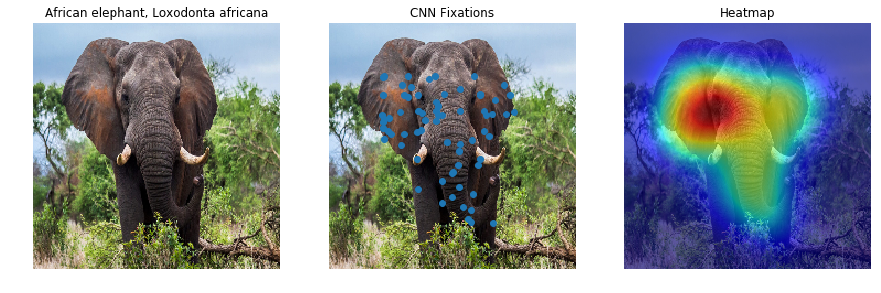

In [209]:
import cv2
import math
import matplotlib.pyplot as plt
def outlier_removal(points, diag):
    neighbors = np.zeros((points.shape[0]))
    selPoints = np.empty((1, 2))
    for i in range(points.shape[0]):
        diff = np.sqrt(np.sum(np.square(points-points[i]), axis=1))
        neighbors[i] = np.sum(diff < diag)
    for i in range(points.shape[0]):
        if neighbors[i] > 0.05*points.shape[0]:
            selPoints = np.append(selPoints, points[i:i+1, :], axis=0)
    selPoints = selPoints[1:, :]
    selPoints = selPoints.astype(int)
    return selPoints


def heatmap(img, points, sigma=20):
    k = (np.min(img.shape[:2])) if (
        np.min(img.shape[:2]) % 2 == 1) else (np.min(img.shape[:2])-1)
    mask = np.zeros(img.shape[:2])
    shape = mask.shape
    for i in range(points.shape[0]):
        # Check if inside the image
        if points[i, 0] < shape[0] and points[i, 1] < shape[1]:
            mask[points[i, 0], points[i, 1]] += 1
    # Gaussian blur the points to get a nice heatmap
    blur = cv2.GaussianBlur(mask, (k, k), sigma)
    blur = blur*255/np.max(blur)
    return blur
def visualize(img_path, points, diag_percent, image_label):
    img = cv2.imread(img_path)
    img= cv2.resize(img, (224, 224)) 
    b, g, r = cv2.split(img)
    img = cv2.merge((r, g, b))
    diag = math.sqrt(img.shape[0]**2 + img.shape[1]**2)*diag_percent
    values = np.asarray(points)
    selPoints = outlier_removal(values, diag)
    # Make heatmap and show images
    hm = heatmap(np.copy(img), selPoints)
    _, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(img), ax[0].axis('off'), ax[0].set_title(image_label)
    ax[1].imshow(img), ax[1].axis('off'),
    ax[1].scatter(selPoints[:, 1], selPoints[:, 0]),
    ax[1].set_title('CNN Fixations')
    ax[2].imshow(img), ax[2].imshow(hm, 'jet', alpha=0.6),
    ax[2].axis('off'), ax[2].set_title('Heatmap')
    plt.show()
    
visualize(img_path, point, diag_percent=0.1, image_label=label)

In [ ]:
flag=False
for layer in base_model.layers:
    if(layer.name=='flatten'):
        break
    #print(layer)
    print(layer.name)
    if "pool" in layer.name:
        print("window=",layer.pool_size)
    if(flag):
        s=layer.strides
        print("strides=",layer.strides[0])
        if len(layer.get_weights())>0:
            S=layer.strides[0]
            F=layer.get_weights()[0].shape[0]
            O=features[name].shape[1]  
            P=(O-1)*S+F-W
            print("padding=",P)
            #print("strides=",S)
    W=features[name].shape[1]  
    flag=True
    print("")
   